In [2]:
import numpy as np
#import pylab
%pylab inline
imax=101
psi=np.zeros([imax, imax])
ks=np.linspace(0,1,101)
for i in range(0, imax):
    psi[i,0]=100
    psi[0,i]=100
    psi[100,i]=100-100*ks[i]
    psi[i,100]=100-100*ks[i]
    #generating matrix with boundary values

print psi

Populating the interactive namespace from numpy and matplotlib
[[ 100.  100.  100. ...,  100.  100.  100.]
 [ 100.    0.    0. ...,    0.    0.   99.]
 [ 100.    0.    0. ...,    0.    0.   98.]
 ..., 
 [ 100.    0.    0. ...,    0.    0.    2.]
 [ 100.    0.    0. ...,    0.    0.    1.]
 [ 100.   99.   98. ...,    2.    1.    0.]]


In [3]:
a = 1
b = 1
c = 1
d = 1
e = -4
f = 0
avg_res = 1e6
cnt = 0
tot_res = 0
while(avg_res > 1e-6):
    tot_res = 0
    for i in range(1, imax-1):
        for j in range(1, imax-1):
            if((i+j)%2==cnt%2):
                res = a*psi[i+1,j] + b*psi[i-1,j] + c*psi[i,j+1] + d*psi[i,j-1] + e*psi[i,j] - f
                psi[i,j] -= res/e
                tot_res += res
    avg_res = tot_res/(imax**2)
    cnt += 1
    
print psi

[[ 100.          100.          100.         ...,  100.          100.          100.        ]
 [ 100.           99.98999874   99.97999749 ...,   99.01999749
    99.00999874   99.        ]
 [ 100.           99.97999749   99.95999498 ...,   98.03999498
    98.01999749   98.        ]
 ..., 
 [ 100.           99.01999749   98.03999498 ...,    3.95999498
     2.97999749    2.        ]
 [ 100.           99.00999874   98.01999749 ...,    2.97999749
     1.98999874    1.        ]
 [ 100.           99.           98.         ...,    2.            1.            0.        ]]


In [15]:
#LECTURE 4

In [1]:
import numpy as np
height=10
width=20
dx=1; dy=1
imax=int(width/dy+1)
jmax=int(height/dx+1)
dkdy= 0.05
C=1.e-9
pressure=np.zeros([imax, jmax])

ks=np.linspace(0,1,112)
def k(y):
    return y*dkdy + C        #y is i
for i in range(0, imax):
    for j in range(0, jmax):
        pressure[i,j] = ks[i]*imax
for j in range(0,((jmax-1)*5/11)+1):
    pressure[0,j]=p0
a = np.zeros([imax,jmax])
b = np.zeros([imax,jmax])
c = np.zeros([imax,jmax])
d = np.zeros([imax,jmax])
e = np.zeros([imax,jmax])
f = np.zeros([imax,jmax])
for i in range(1,imax-1):
    for j in range(1,jmax-1):
        y = j*dy
        a[i,j]=1.0
        b[i,j]=1.0
        c[i,j]=1.0 + dkdy*dx/(2.0*k(y))
        d[i,j]=1.0 - dkdy*dx/(2.0*k(y))
        e[i,j]=-4.0
        f[i,j]=-rho*g*(dx**2)*dkdy/k(y)
for i in range(0,((imax-1)*5/11)+1):
    a[i,jmax-1]=0      #boundary 1
    b[i,jmax-1]=0
    c[i,jmax-1]=0
    d[i,jmax-1]=0
    e[i,jmax-1]=1.0
    f[i,jmax-1]=p0
for i in range(((imax-1)*6/11)+1,imax):
    a[i,jmax-1]=0      #boundary 2
    b[i,jmax-1]=0
    c[i,jmax-1]=0
    d[i,jmax-1]=0
    e[i,jmax-1]=1.0
    f[i,jmax-1]=0
for j in range(0,jmax):
    a[0,j]=1.0      #boundary 3
    b[0,j]=0
    c[0,j]=0
    d[0,j]=0
    e[0,j]=-1.0
    f[0,j]=0
    a[imax-1,j]=0      #boundary 4
    b[imax-1,j]=-1.0
    c[imax-1,j]=0
    d[imax-1,j]=0
    e[imax-1,j]=1.0
    f[imax-1,j]=0
for i in range(((imax-1)*5/11)+1,((imax-1)*6/11)+1):
    a[i,jmax-1]=0      #boundary 5
    b[i,jmax-1]=0
    c[i,jmax-1]=0
    d[i,jmax-1]=-1.0
    e[i,jmax-1]=1.0
    f[i,jmax-1]=-rho*g*dy
for i in range(0,imax):
    a[i,0]=0     #boundary 6
    b[i,0]=0
    c[i,0]=1.0
    d[i,0]=0
    e[i,0]=-1.0
    f[i,0]=-rho*g*dy
print ((imax-1)*5/11)+1, ((imax-1)*6/11)+1
#print a
#print b
#print c
#print d
#print e
#print f
#print pressure
#code defines all values for initial matrix and a-f

NameError: name 'p0' is not defined

In [ ]:
import pylab
avg_res = 1e6
cnt = 0
tot_res = 0
while(avg_res > 1e-6):
    tot_res = 0
    for i in range(0, imax):
        for j in range(0, jmax):
            if((i+j)%2==cnt%2):
                res = e[i,j]*pressure[i,j] - f[i,j]
                if i != 0:
                    res += b[i,j]*pressure[i-1,j]
                if i != imax-1:
                    res += a[i,j]*pressure[i+1,j]
                if j != 0:
                    res += d[i,j]*pressure[i,j-1]
                if j != jmax-1:
                    res += c[i,j]*pressure[i,j+1]
                pressure[i,j] -= res/e[i,j]
                tot_res += abs(res)
    avg_res = tot_res/(imax*jmax)
    cnt += 1
#print pressure
print cnt
pressurerot = rot90(pressure)
imshow(pressurerot)
colorbar()

In [76]:
step=1
xflow = np.zeros([imax, jmax])
yflow = np.zeros([imax, jmax])
for i in range(0, imax):
    for j in range(0, jmax):
        x = i*dx
        y = j*dy
        K = y*dkdy + C 
        if (0 < i < imax-1):
            xflow[i,j] = -(K/mu)*((pressure[i+1,j]-pressure[i-1,j])/(2*dx))
        elif i == imax-1:
            xflow[i,j] = -(K/mu)*((pressure[i,j]-pressure[i-1,j])/dx)
        else:
            xflow[i,j] = -(K/mu)*((pressure[i+1,j]-pressure[i,j])/dx)

        if (0 < j < jmax-1):
            yflow[i,j] = -(K/mu)*(((pressure[i,j+1]-pressure[i,j-1])/(2*dy))+rho*g)
        elif j == jmax-1:
            yflow[i,j] = -(K/mu)*(((pressure[i,j]-pressure[i,j-1])/dy)+rho*g)
        else:
            yflow[i,j] = -(K/mu)*(((pressure[i,j+1]-pressure[i,j])/dy)+rho*g)
            
xflow_s=xflow[::step,::step]
yflow_s=yflow[::step,::step]



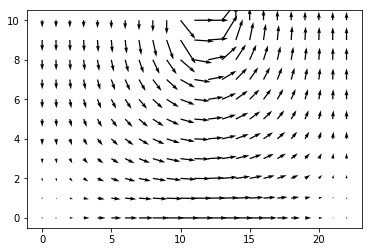

In [78]:
quiver(flipud(rot90(xflow_s)), flipud(rot90(yflow_s)))
show()
#imshow(rot90(pressure))
#imshow(rot90(yflow))
#colorbar()


Populating the interactive namespace from numpy and matplotlib
[[  98100.          121663.09258998  141074.49319698 ...,   27383.11592447
    18660.34181702    9810.        ]
 [  98100.          121663.09258998  141074.49319711 ...,   27383.11592448
    18660.34181702    9810.        ]
 [  98100.          121040.62831232  140166.24395279 ...,   27331.65512012
    18631.79124967    9810.        ]
 ..., 
 [      0.            2980.9910882     5847.11338722 ...,   14099.27427313
    11989.31348345    9810.        ]
 [      0.            2977.78343564    5841.22873475 ...,   14095.27786665
    11987.17424226    9810.        ]
 [      0.            2977.78343564    5841.22873459 ...,   14095.27786652
    11987.17424226    9810.        ]]
18568


C:\Program Files (x86)\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab', 'e', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


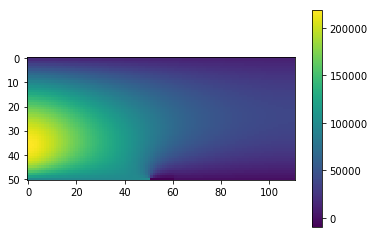

In [7]:
import pylab
%pylab inline
print pressure
print cnt
pressurerot = rot90(pressure)
imshow(pressurerot)
colorbar()